# Objectives

- Assess the performance of machine learning models

- Diagnose the common problems in machine learning algorithms 

- Evaluate the predictive models using the different performance metrics


In [67]:
import pandas as pd

In [70]:
df = pd.read_csv(
        'http://archive.ics.uci.edu/ml/'
        'machine-learning-databases'
        '/breast-cancer-wisconsin/wdbc.data',
        header=None)


In [71]:
print(df.shape)
df.head(3)

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [72]:
target = df.loc[:, 1]

In [76]:
from sklearn.preprocessing import LabelEncoder

Take the independent variables as X and the column 1 as dependent variable. Use LabelEncoder for converting labels into integers.

In [77]:
X = df.loc[:,2:].values
y = df.loc[:, 1].values
le = LabelEncoder() # instantiate LabelEncoder 
y = le.fit_transform(y) # Fit le object and then transform labels to integers 
print(' Actual y labels: {}\n'.format(df.loc[:, 1].values[:5]),
      'Transformed y values: {}\n'.format(y[:5]),
      'All labels available in the data {}'.format(le.classes_))

 Actual y labels: ['M' 'M' 'M' 'M' 'M']
 Transformed y values: [1 1 1 1 1]
 All labels available in the data ['B' 'M']


In [78]:
import numpy as np
print(np.unique(y, return_counts = True)) # number of 1's and 0's after transformation
print(np.unique(df.loc[:, 1], return_counts = True)) # Counts for each label in the original data

(array([0, 1]), array([357, 212]))
(array(['B', 'M'], dtype=object), array([357, 212]))


In [81]:
y.mean()

0.37258347978910367

__Train test split__

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

__Pipelines: Transformers and Estimators__ 

In [9]:
# preprocessing tools
from sklearn.preprocessing import StandardScaler # for scaling the features
from sklearn.preprocessing import PolynomialFeatures # for checking interaction effect between features

## models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
    
# for pipelines
from sklearn.pipeline import make_pipeline

In [10]:
## Let's start with Logistic Regression'

log_pipe = make_pipeline(StandardScaler(), # if we want to use regularization we need scaler 
                         PolynomialFeatures(degree=2, interaction_only= True), # we will only check the interactions, 
                         LogisticRegression(random_state = 1, solver = 'lbfgs'))

## Without further ado check the baseline

log_pipe.fit(X_train, y_train) # pipe behaves like sklearn estimator.

y_pred = log_pipe.predict(X_train) # predictions of vanilla log_reg model.

log_pipe.score(X_train, y_train) # score looks pretty impressive can we expect similar performance on the test?

0.9976525821596244

__An overview look for the pipelines__

<img src='img/pipelines.png' width = 450/>

[Source: Python Machine Learning](https://www.amazon.com/dp/1789955750?tag=duckduckgo-ffab-20&linkCode=osi&th=1&psc=1)

__Cross validation with pipelines__

__Holdout Cross_Validation__
<img src= 'img/cross_validation.png' width = 450/>

__Kfold Cross_Validation__

<img src = 'img/kfold_cross.png' width= 450/>

__Understanding Over or Underfitting__

In [85]:
import numpy as np

In [87]:
from sklearn.model_selection import validation_curve

parameters = [0.01, 0.1, 1, 10, 100] # we will be checking the regularization parameter in Log_reg

# we could do the same thing with

parameters = np.logspace(-3,2,5)

np.set_printoptions(suppress= True)

parameters

array([  0.001     ,   0.01778279,   0.31622777,   5.62341325,
       100.        ])

Now let's see how the train and validation scores are changing as we change C - Values:

In [88]:
train_scores, test_scores = validation_curve(estimator = log_pipe, 
                                             X = X_train,
                                             y= y_train,
                                             param_name = 'logisticregression__C', ## this is the way for accessing a parameter of a 
                                                                                                    #transformer within pipeline
                                             param_range = parameters, 
                                             cv = 10, ## note that this can take too long if your data is big
                                             verbose = 1, # algorithms will update us about the progress
                                             n_jobs = -1 # we will be using the other processing units in parallel
                                            )
                                             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


Now we can simply plot the results

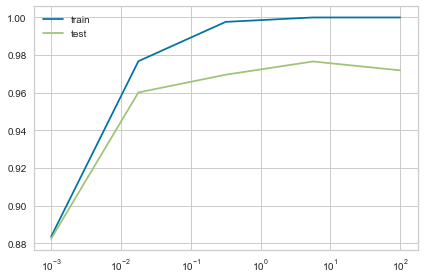

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(parameters, train_scores.mean(axis= 1), label = 'train')
plt.xscale('log')
plt.plot(parameters, test_scores.mean(axis = 1), label = 'test')
plt.legend()
plt.tight_layout()


but we can make it a little bit fancier:

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


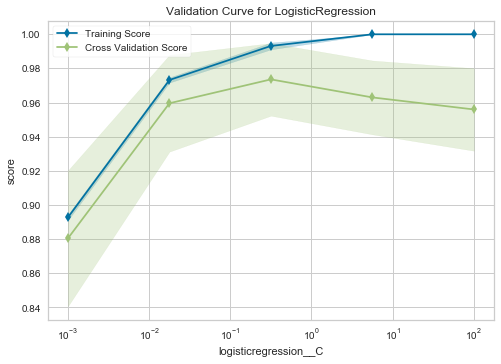

In [15]:

from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(model = log_pipe, 
                                 X = X_train,
                                 y= y_train,
                                 param_name = 'logisticregression__C', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = 10, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = True 
                                )
                                             

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

We can also try StratifiedKfold validation

//anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


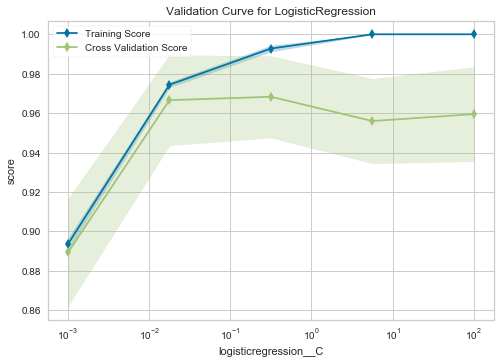

In [16]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state=1 )


viz = ValidationCurve(model = log_pipe, 
                                 X = X_train,
                                 y= y_train,
                                 param_name = 'logisticregression__C', ## this is the way for accessing a parameter of a 
                                                                                        #transformer within pipeline
                                 param_range = parameters, 
                                 cv = cv, ## note that this can take too long if your data is big
                                 verbose = 1, # algorithms will update us about the progress
                                 n_jobs = -1, # we will be using the other processing units in parallel
                                 logx = True 
                                )
                                             

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

__Fine-Tuning ML models via gridsearch__

GridSearch approach is very straight forward.

__Step1:__ Decide an estimator to use.

Suppose we would like to use a decision_tree classifier.

__Step2:__ Create a parameter grid

Suppose for the decision trees we would like to find best values for: 

max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

and 

max_features = ['auto', 'sqrt', 'log2', 25]

param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
              'max_features': ['auto', 'sqrt', 'log2', 25]
              }
              
__Step3:__ Instantiate GridSearchCV with these parameters.

__Step4:__ Fit gridsearchcv object.


In [17]:
from sklearn.model_selection import GridSearchCV

In [111]:
tree_clf = DecisionTreeClassifier(min_samples_leaf= 10)

max_depth_params = range(2, 12) ## values between 2 to 11 total: 10 values

max_features_param = [None, 'auto', 'sqrt', 'log2', 25] ## total of 5 values

param_grid = {'max_depth': max_depth_params, 'max_features': max_features_param}

gridsearch = GridSearchCV(estimator = tree_clf, 
                          param_grid = param_grid,
                          n_jobs = -1, ## paralllel computation
                          verbose = 1, ## gives feedback
                          cv = 10,     ## cross-validate
                          scoring = 'roc_auc',  ## you can use multiple scoring too
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished


In [112]:
print(gridsearch.best_score_) # note if you use multiple this doesn't work
print(gridsearch.best_estimator_) # doesn't work for multiple scoring

0.9828970797720797
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [113]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [114]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

In [115]:
# Recall that gridsearch.best_estimator is an decisiontreeclassifier object
# so score returns 'accuracy' by default
gridsearch.best_estimator_.score(X_train, y_train)

0.9577464788732394

In [116]:
cv_results_df[colums].sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
26,"{'max_depth': 7, 'max_features': 'auto'}",0.982897,0.017761,1,0.992170,0.002547
12,"{'max_depth': 4, 'max_features': 'sqrt'}",0.973547,0.024213,2,0.989895,0.003220
22,"{'max_depth': 6, 'max_features': 'sqrt'}",0.971839,0.036620,3,0.991910,0.002218
28,"{'max_depth': 7, 'max_features': 'log2'}",0.971668,0.034267,4,0.991376,0.002139
17,"{'max_depth': 5, 'max_features': 'sqrt'}",0.971323,0.026337,5,0.989715,0.003293
46,"{'max_depth': 11, 'max_features': 'auto'}",0.969211,0.031940,6,0.992048,0.001760
47,"{'max_depth': 11, 'max_features': 'sqrt'}",0.965269,0.029712,7,0.993190,0.001861
37,"{'max_depth': 9, 'max_features': 'sqrt'}",0.964726,0.032217,8,0.991618,0.002136
34,"{'max_depth': 8, 'max_features': 25}",0.964653,0.021037,9,0.994116,0.001033
44,"{'max_depth': 10, 'max_features': 25}",0.963776,0.025864,10,0.993809,0.000961


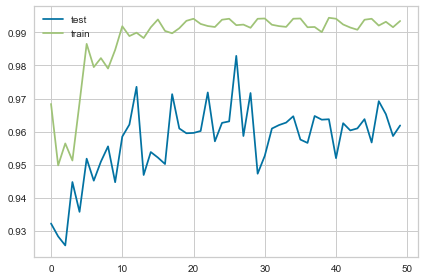

In [117]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(50), roc_test_scores, label = 'test')
plt.plot(range(50), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

We can also use pipelines with GridSearchCV. 

In [37]:
log_pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [38]:
param_grid = {'logisticregression__C': np.logspace(-3, 2, 10),  
              'polynomialfeatures__interaction_only': [True, False]}


gridsearch = GridSearchCV(estimator = log_pipe, 
                          param_grid = param_grid,
                          n_jobs = -1, 
                          verbose = 1,
                          cv = 10, 
                          scoring = 'roc_auc', 
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished


In [43]:
## let's see best score and best parameters

gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('logisticregression',
                 LogisticRegression(C=0.1668100537200059, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [44]:
gridsearch.best_score_

0.9927884615384615

In [45]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00757194, 0.0076946 , 0.01049261, 0.01510475, 0.017397  ,
        0.02092292, 0.0263643 , 0.02553337, 0.02871079, 0.02976658,
        0.03497491, 0.03730023, 0.04682381, 0.04641652, 0.05027933,
        0.05000169, 0.05199883, 0.05122185, 0.05634418, 0.04783592]),
 'std_fit_time': array([0.00114445, 0.00059123, 0.00208352, 0.00309733, 0.00244614,
        0.004344  , 0.00401174, 0.00330282, 0.00420667, 0.00371073,
        0.00198515, 0.00302495, 0.00461044, 0.00286783, 0.00472948,
        0.00231105, 0.00448408, 0.00719614, 0.0044618 , 0.00622331]),
 'mean_score_time': array([0.00123456, 0.0012006 , 0.00158551, 0.00191011, 0.00181911,
        0.00231445, 0.00283642, 0.0021616 , 0.00208826, 0.00236402,
        0.00261097, 0.00209219, 0.00234332, 0.00225036, 0.00212765,
        0.0022078 , 0.00246103, 0.00247445, 0.00214636, 0.00180118]),
 'std_score_time': array([0.00018783, 0.00007423, 0.00035742, 0.00036811, 0.00041256,
        0.0006422 , 0.0012272 , 0.000257

In [51]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

log_reg_results = pd.DataFrame(gridsearch.cv_results_)[colums]
log_reg_results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,"{'logisticregression__C': 0.1668100537200059, ...",0.992788,0.009508,1,0.999817,0.000071
6,{'logisticregression__C': 0.046415888336127795...,0.992575,0.010337,2,0.999195,0.000225
7,{'logisticregression__C': 0.046415888336127795...,0.992121,0.011486,3,0.999294,0.000217
9,"{'logisticregression__C': 0.1668100537200059, ...",0.992112,0.011341,4,0.999843,0.000073
5,"{'logisticregression__C': 0.01291549665014884,...",0.991417,0.012198,5,0.997869,0.000452
4,"{'logisticregression__C': 0.01291549665014884,...",0.991400,0.011428,6,0.997796,0.000472
11,"{'logisticregression__C': 0.5994842503189409, ...",0.991150,0.011069,7,1.000000,0.000000
10,"{'logisticregression__C': 0.5994842503189409, ...",0.991124,0.010840,8,1.000000,0.000000
12,"{'logisticregression__C': 2.1544346900318843, ...",0.990162,0.011817,9,1.000000,0.000000
13,"{'logisticregression__C': 2.1544346900318843, ...",0.989948,0.012203,10,1.000000,0.000000


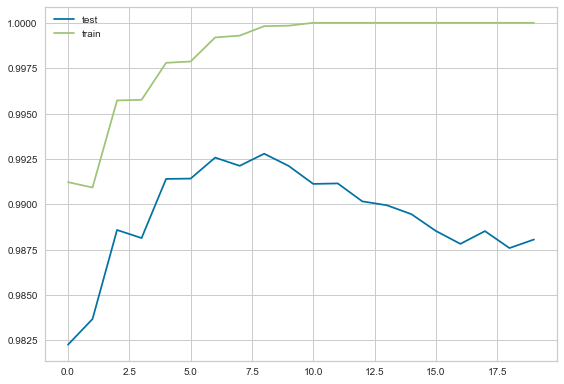

In [41]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(20), roc_test_scores, label = 'test')
plt.plot(range(20), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

In [52]:
from sklearn.model_selection import cross_val_score

In [55]:
gs = GridSearchCV(estimator= log_pipe, param_grid = param_grid, scoring = 'roc_auc', cv = 2 )

scores = cross_val_score(gs, X_train, y_train, scoring = 'roc_auc', cv = 5)

print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))

CV accuracy: 0.992 +/- 0.007


In [64]:
y_test_pred = gridsearch.best_estimator_.predict_proba(X_test)[:,1]

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y_test, y_test_pred)

0.9926624737945493

## Extras

[Faster Hyperparameter tuning: Randomized Approach](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Learning the hyperparameter space](https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a)

[Using sklearn for plotting learning curves](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

[YellowBrick Validation Curve](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html)